In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy.optimize as opt
import copy
np.set_printoptions(threshold=np.inf, suppress=True, formatter={'float': '{: 0.8f}'.format}, linewidth=75)
%matplotlib inline

In [3]:
def kron(A, B):
    return la.kron(A, B)

In [4]:
def kronsum(A, B):
    if A.shape[0] != A.shape[1]:
        raise ValueError('A is not square')

    if B.shape[0] != B.shape[1]:
        raise ValueError('B is not square')
    
    L = kron(A, np.eye(B.shape[0]))
    R = kron(np.eye(A.shape[0]), B)
    
    return L+R

In [5]:
n = 1                   # Количество матриц D_k
p_num = 150             # Количество векторов стац. вероятн. p
eps_G = 10 ** (-6)      # Точность нахождения матр. G
eps_Phi = 10 ** (-6)    # Точность нахождения матр. Phi
eps_p_i = 10 ** (-6)    # Точность нахождения векторов p

In [6]:
# Входной BMAP
matrD_0 = np.array([[-2]])
matrD = np.array([[85, 0.99], [0.2, 2.54]]) * 0.025
matrD_k = [matrD_0]

W_ = matrD_0.shape[0]
W = W_ - 1

q = 0.8
for k in range(1, n+1):
    matrD_k.append(np.array([[2]]))

for matr in matrD_k:
    print(matr)

[[-2]]
[[2]]


In [7]:
# Характеристики входного BMAP

matrD_1_ = np.zeros(matrD_k[0].shape)
for matr in matrD_k:
    matrD_1_ += matr
print('matrD_1_ =', matrD_1_)
matr_a = np.array(copy.deepcopy(matrD_1_))
for i in range(matr_a.shape[0]):
    matr_a[i][0] = 1

matr_b = np.zeros((matr_a.shape[0], 1))
matr_b[0][0] = 1

matr_a = np.transpose(matr_a)

theta = la.solve(matr_a, matr_b).reshape(-1)    # Алгоритм проверен.

matrdD_1_ = np.array(copy.deepcopy(matrD_k[1]))

print('Theta =', theta)

for i in range(2, n+1):
    matrdD_1_ += matrD_k[i] * i
vect_e = np.array([[1.] for i in range(0, matrD_1_.shape[0])])
lamD = np.dot(np.dot(theta, matrdD_1_), vect_e)
print('lambda =', lamD[0])

matrD_1_ = [[ 0.00000000]]
Theta = [ 1.00000000]
lambda = 2.0


In [8]:
# Поток поломок MAP
matrH0 = np.array([[-1000]])
matrH1 = np.array([[1000]])    
V_ = matrH1.shape[0]
V = V_ - 1
matrH = matrH0 + matrH1
matr_a = copy.deepcopy(matrH)
for i in range(matr_a.shape[0]):
    # print(matr_a)
    matr_a[i][0] = 1
    
matr_b = np.zeros((matr_a.shape[0], 1))
matr_b[0][0] = 1

matr_a = np.transpose(matr_a)

print('H_0 =', matrH0)
print('H_1 =', matrH1)

gamma = la.solve(matr_a, matr_b).reshape(-1)

vect_e = np.array([[1.] for i in range(0, matrD_1_.shape[0])])
h = np.dot(np.dot(gamma, matrH1), vect_e)
print('h =', h[0])

H_0 = [[-1000]]
H_1 = [[1000]]
h = 1000.0


In [9]:
# Поток обслуживания PH1
beta1 = np.array([[1]])
matrS1 = np.array([[-20]])
M1 = matrS1.shape[0]
M1_ = M1 + 1
M1_e = np.array([[1]])
matrS1_0 = - np.dot(matrS1, M1_e)
vect_e = np.array([[1.] for i in range(0, matrS1.shape[0])])
# print(np.dot(beta1, la.inv(matrS1)))
mu_1 = -la.inv(np.dot(np.dot(beta1, la.inv(matrS1)), vect_e))
print(mu_1)

[[ 20.00000000]]


In [10]:
# Поток обслуживания PH2
beta2 = np.array([[1]])
matrS2 = np.array([[-5]])
M2 = matrS2.shape[0]
M2_ = M2 + 1
M2_e = np.array([[1]])
matrS2_0 = - np.dot(matrS2, M2_e)

vect_e = np.array([[1.] for i in range(0, matrS2.shape[0])])
mu_2 = -la.inv(np.dot(np.dot(beta2, la.inv(matrS2)), vect_e))
print(mu_2)

[[ 5.00000000]]


In [11]:
matrS_w = kron(np.dot(matrS1_0, beta1), 
               np.dot(M2_e, beta2)) + kron(np.dot(M1_e, beta1), np.dot(matrS2_0, beta2))

In [12]:
# Поток переключения с прибора-1 на прибор-2
alpha1 = np.array([[0.05, 0.95]])
matrA1 = np.array([[-1.86075, 0.], [0., -146.9994]])
L1 = matrA1.shape[0]
L1_ = L1 + 1
L1_e = np.array([[1], [1]])
matrA1_0 = - np.dot(matrA1, L1_e)

vect_e = np.array([[1.] for i in range(0, matrA1.shape[0])])
kappa_1 = -la.inv(np.dot(np.dot(alpha1, la.inv(matrA1)), vect_e))
print(kappa_1)

[[ 29.99985287]]


In [13]:
# Поток переключения с прибора-2 на прибор-1
alpha2 = np.array([[0.05, 0.95]])
matrA2 = np.array([[-5.58225, 0.], [0., -440.9982]])
L2 = matrA2.shape[0]
L2_ = L2 + 1
L2_e = np.array([[1], [1]])
matrA2_0 = - np.dot(matrA2, L2_e)

vect_e = np.array([[1.] for i in range(0, matrA1.shape[0])])
kappa_2 = -la.inv(np.dot(np.dot(alpha2, la.inv(matrA2)), vect_e))
print(kappa_2)

[[ 89.99955862]]


In [14]:
# Поток ремонта PH
tau = np.array([[1]])
matrT = np.array([[-0.00001]])
T_e = np.array([[1]])
matrT0 = - np.dot(matrT, T_e)

R = matrT.shape[0]
R_ = R + 1
vect_e = np.array([[1.] for i in range(0, matrT.shape[0])])
phi = -la.inv(np.dot(np.dot(tau, la.inv(matrT)), vect_e))
print(phi)

[[ 0.00001000]]


In [15]:
a = W_ * V_
print('a =', a)

a = 1


In [16]:
# Q~0
block00 = kronsum(matrD_k[0], matrH0)
block03 = kron(kron(kron(np.eye(W_), matrH1), tau), alpha1)
block10 = kron(np.eye(a), matrA2_0)
block11 = kronsum(kronsum(matrD_k[0], matrH0), matrA2)
block12 = kron(kron(kron(np.eye(W_), matrH1), tau), L2_e)
block21 = kron(kron(np.eye(a), matrT0), alpha2)
block22 = kronsum(kronsum(matrD_k[0], matrH), matrT)
block30 = kron(kron(np.eye(a), matrT0), L1_e)
block32 = kron(kron(np.eye(a), np.eye(R)), matrA1_0)
block33 = kronsum(kronsum(kronsum(matrD_k[0], matrH), matrT), matrA1)
block01 = np.zeros((block00.shape[0], block11.shape[1]))
block02 = np.zeros((block00.shape[0], block12.shape[1]))
block13 = np.zeros((block10.shape[0], block03.shape[1]))
block20 = np.zeros((block21.shape[0], block10.shape[1]))
block23 = np.zeros((block21.shape[0], block03.shape[1]))
block31 = np.zeros((block30.shape[0], block11.shape[1]))

print(block30.shape)

matrQw_0 = np.bmat([[block00, block01, block02, block03],
                    [block10, block11, block12, block13], 
                    [block20, block21, block22, block23],
                    [block30, block31, block32, block33]])
print(matrQw_0.shape)

(2, 1)
(6, 6)


In [17]:
# Q~k
matrQw_k = [matrQw_0]
for i in range(1, n+1):
    block0 = kron(kron(matrD_k[i], np.eye(V_)), beta1)
    block1 = kron(kron(kron(matrD_k[i], np.eye(V_)), beta2), np.eye(L2))
    block2 = kron(kron(kron(matrD_k[i], np.eye(V_)), beta2), np.eye(R))
    block3 = kron(kron(matrD_k[i], np.eye(V_)), np.eye(R*L1))
    matr_temp = la.block_diag(block0, block1, block2, block3)
    matrQw_k.append(matr_temp)
    
print(matrQw_k[0].shape)
print(matrQw_k[1].shape)

for i in range(matrQw_k[0].shape[0]):
    sum = 0
    for matr in matrQw_k:
        sum += np.sum(matr[i])
    # print('matrQw_k[' + str(i) + '] = ', sum)

(6, 6)
(6, 6)


In [18]:
# Q^0
block0 = kron(np.eye(a), matrS1_0)
block1 = kron(kron(np.eye(a), matrS2_0), np.eye(L2))
block2 = kron(kron(np.eye(a), matrS2_0), np.eye(R))
block3 = np.zeros((a*R*L1, a*R*L1))
matrQv_0 = la.block_diag(block0, block1, block2, block3)

print(matrQv_0.shape)

(6, 6)


In [19]:
# Q_0
block0 = kron(np.eye(a), np.dot(matrS1_0, beta1))
block1 = kron(kron(np.eye(a), np.dot(matrS2_0, beta2)), np.eye(L2))
block2 = kron(kron(np.eye(a), np.dot(matrS2_0, beta2)), np.eye(R))
block3 = np.zeros((a*R*L1, a*R*L1))
matrQ_0 = la.block_diag(block0, block1, block2, block3)

print(matrQ_0.shape)

(6, 6)


In [20]:
# Q_1
block00 = kronsum(kronsum(matrD_k[0], matrH0), matrS1)
block03 = kron(kron(kron(kron(np.eye(W_), matrH1), M1_e), tau), alpha1)
block10 = kron(kron(kron(np.eye(a), M2_e), beta1), matrA2_0)
block11 = kronsum(kronsum(kronsum(matrD_k[0], matrH0), matrS2), matrA2)
block12 = kron(kron(kron(kron(np.eye(W_), matrH1), np.eye(M2)), tau), L2_e)
block21 = kron(kron(kron(np.eye(a), np.eye(M2)), matrT0), alpha1)
block22 = kronsum(kronsum(kronsum(matrD_k[0], matrH), matrS2), matrT)
block30 = kron(kron(kron(np.eye(a), beta1), matrT0), L1_e)
block32 = kron(kron(kron(np.eye(a), beta2), np.eye(R)), matrA1_0)
block33 = kronsum(kronsum(kronsum(matrD_k[0], matrH), matrT), matrA1)
block01 = np.zeros((block00.shape[0], block11.shape[1]))
block02 = np.zeros((block00.shape[0], block12.shape[1]))
block13 = np.zeros((block10.shape[0], block03.shape[1]))
block20 = np.zeros((block21.shape[0], block10.shape[1]))
block23 = np.zeros((block21.shape[0], block03.shape[1]))
block31 = np.zeros((block30.shape[0], block11.shape[1]))

matrQ_1 = np.bmat([[block00, block01, block02, block03], 
                   [block10, block11, block12, block13], 
                   [block20, block21, block22, block23], 
                   [block30, block31, block32, block33]])

print(matrQ_1.shape)

(6, 6)


In [21]:
matrQ_k = [matrQ_0, matrQ_1]
for k in range(2, n+2):
    block0 = kron(matrD_k[k-1], np.eye(V_ * M1))
    block1 = kron(matrD_k[k-1], np.eye(V_*M2*L2))
    block2 = kron(matrD_k[k-1], np.eye(V_*M2*R))
    block3 = kron(matrD_k[k-1], np.eye(V_*R*L1))
    matr_temp = la.block_diag(block0, block1, block2, block3)
    matrQ_k.append(matr_temp)

# for i in range(matrQ_k[0].shape[0]):
#     sum = np.sum(matrQv_0[i])
#     for j in range(1, np.array(matrQ_k).shape[0]):
#         sum += np.sum(matrQ_k[j][i])
#     print('matrQ_k[' + str(i) + '] = ', sum)

In [22]:
# Проверка генератора Q

In [23]:
# Поиск матрицы G

matrQ_1_neg_inv = np.linalg.inv(-matrQ_k[1])


def calc_G(matrG_prev):
    temp_sum = np.array(copy.deepcopy(matrQ_k[0])) 
    for k in range(2, n + 2):
        temp_sum += np.dot(matrQ_k[k], np.linalg.matrix_power(matrG_prev, k))
    matrG_new = np.dot(matrQ_1_neg_inv, temp_sum)
    return matrG_new

matrG_old = np.eye(matrQ_k[1].shape[0])
matrG = calc_G(matrG_old)

i = 1
try:
    while la.norm(matrG - matrG_old, ord=np.inf) >= eps_G:
        matrG_old = matrG
        matrG = calc_G(matrG_old)
        i += 1
except:
    print(matrG_old)
print(i)
print(la.norm(matrG, ord=np.inf))
print(matrG.shape)

6
1.0000000000000002
(6, 6)


In [24]:
la.norm(matrG, ord=np.inf)

1.0000000000000002

In [25]:
temp_sum = np.array(copy.deepcopy(matrQ_k[1]))
for k in range(2, n+2):
    temp_sum += np.dot(matrQ_k[k], np.linalg.matrix_power(matrG, k-1))
matrG_0 = la.inv(temp_sum)
matrG_0 = -np.dot(matrG_0, matrQv_0)
# pd.DataFrame(matrG_0)
la.norm(matrG_0, ord=np.inf)

1.0

In [26]:
matrQ_il = []
for i in range(0, p_num):
    matrQ_il.append([])
    if i == 0:
        for l in range(0, n + 1):
            # здесь до n, т.к. нет больше матриц Q_k
            temp_matr = np.array(copy.deepcopy(matrQw_k[l]))
            for k in range(l + 1, n + 1):
                mult_matr = np.array(copy.deepcopy(matrQw_k[k]))
                for kk in range(k - 1, l - 1, -1):
                    if kk == 0:
                        mult_matr = np.dot(mult_matr, matrG_0)
                    else:
                        mult_matr = np.dot(mult_matr, matrG)
                print("mult matr 0 shape : ", mult_matr.shape)
                temp_matr += mult_matr
            matrQ_il[i].append(temp_matr)
        for l in range(n + 1, p_num):
            matrQ_il[i].append(np.zeros(matrQw_k[1].shape))
    else:
        for l in range(0, p_num):
            if l >= i and (l - i) <= (n + 1):
                if (l - i + 1) <= (n + 1): 
                    temp_matr = np.array(copy.deepcopy(matrQ_k[l - i + 1]))
                else:
                    temp_matr = np.zeros(matrQ_k[0].shape)
                    
                for k in range(l + 1, p_num):  # sum from l+1 to inf
                    if (k - i + 1) <= (n + 1):
                        mult_matr = np.array(copy.deepcopy(matrQ_k[k - i + 1]))
                        for kk in range(l, k):
                            mult_matr = np.dot(mult_matr, matrG)
                        
                        temp_matr += mult_matr
                matrQ_il[i].append(temp_matr)
            else:
                matrQ_il[i].append(np.zeros(matrQ_k[0].shape))

# print(len(matrQ_il[3]))
print(la.norm(matrQ_il[1][3], ord=np.inf))

mult matr 0 shape :  (6, 6)


0.0


In [26]:
matrPhi_0 = np.eye(matrQ_il[0][0].shape[0])
matrPhi_l = [matrPhi_0]
for l in range(1, p_num):
    temp_matr = np.dot(np.dot(matrPhi_l[0], matrQ_il[0][l]), la.inv(-matrQ_il[l][l]))
    for i in range(1, l):
        # print(matrPhi_l[i].dot(matrQ_il[i][l]).dot(la.inv(-matrQ_il[l][l])).shape)
        temp_matr += np.dot(np.dot(matrPhi_l[i], matrQ_il[i][l]), la.inv(-matrQ_il[l][l]))
    matrPhi_l.append(temp_matr)
print(matrPhi_l[1].shape)

(6, 6)


In [28]:
print(la.norm(matrPhi_l[p_num - 1], ord=np.inf))

8.619144026726389e-43


In [29]:
# Вычисление p_0
matr_a = np.array(- copy.deepcopy(matrQ_il[0][0]))
vect_eaR = np.array([[1.] for _ in range(matrPhi_l[0].shape[1])])
for i in range(1, p_num):
    vect_e = np.array([[1.] for _ in range(matrPhi_l[i].shape[1])])
    vect_eaR += np.dot(matrPhi_l[i], vect_e)

for i in range(matr_a.shape[0]):
    matr_a[i][0] = vect_eaR[i][0]

matr_b = np.zeros((matr_a.shape[0], 1))
matr_b[0][0] = 1.
matr_a = np.transpose(matr_a)
p0 = np.transpose(la.solve(matr_a, matr_b))

# print(p0)
print(p0)

[[ 0.00000000  0.00000000  0.00000000  0.59999990  0.00000002  0.00000001]]


In [30]:
vect_p_l = [p0]
p_sums = [np.sum(p0)]
print('p0 = ', vect_p_l[0][0])
print('sum0 = ', p_sums[0])
for l in range(1, p_num):
    vect_p_l.append(np.dot(vect_p_l[0], matrPhi_l[l]))
    p_sums.append(np.sum(vect_p_l[l]))
    print('p' + str(l) + ' = ', vect_p_l[l][0])
    print('sum' + str(l) + ' = ', p_sums[l])
print('sum = ', np.sum(p_sums))

p0 =  [ 0.00000000  0.00000000  0.00000000  0.59999990  0.00000002  0.00000001]
sum0 =  0.599999940376
p1 =  [ 0.00000000  0.00000000  0.00000000  0.23999997  0.00000002  0.00000000]
sum1 =  0.239999999394
p2 =  [ 0.00000000  0.00000000  0.00000000  0.09600000  0.00000001  0.00000000]
sum2 =  0.0960000150952
p3 =  [ 0.00000000  0.00000000  0.00000000  0.03840001  0.00000001  0.00000000]
sum3 =  0.0384000153014
p4 =  [ 0.00000000  0.00000000  0.00000000  0.01536001  0.00000001  0.00000000]
sum4 =  0.0153600114465
p5 =  [ 0.00000000  0.00000000  0.00000000  0.00614400  0.00000000  0.00000000]
sum5 =  0.0061440075485
p6 =  [ 0.00000000  0.00000000  0.00000000  0.00245760  0.00000000  0.00000000]
sum6 =  0.00245760464225
p7 =  [ 0.00000000  0.00000000  0.00000000  0.00098304  0.00000000  0.00000000]
sum7 =  0.000983042731334
p8 =  [ 0.00000000  0.00000000  0.00000000  0.00039322  0.00000000  0.00000000]
sum8 =  0.000393217559015
p9 =  [ 0.00000000  0.00000000  0.00000000  0.00015729  0.000

1.73163086904e-12
p30 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum30 =  6.92918533559e-13
p31 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum31 =  2.77305315984e-13
p32 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum32 =  1.10993568249e-13
p33 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum33 =  4.44344380471e-14
p34 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum34 =  1.77929486098e-14
p35 = 

 [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum35 =  7.12711213339e-15
p36 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum36 =  2.85599041007e-15
p37 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum37 =  1.14506177034e-15
p38 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum38 =  4.59405595335e-16
p39 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum39 =  1.84477589291e-16
p40 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum40 =  7.41616136057e-17
p41 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum41 =  2.98566179587e-17
p42 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum42 =  1.20420956519e-17
p43 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum43 =  4.86835599371e-18
p44 =  [ 0.00000000  0.00000000  0

 4.40050454445e-33
p92 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum92 =  2.27956250419e-33
p93 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum93 =  1.18087089888e-33
p94 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum94 =  6.11722972796e-34
p95 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum95 =  3.16889817409e-34
p96 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum96 =  1.64158224298e-34
p97 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum97 =  8.50389084507e-35
p98 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum98 =  4.40527703963e-35
p99 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum99 =  2.28207111275e-35
p100 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum100 =  1.18218496024e-35
p101 = 

[ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum145 =  1.65485695017e-48
p146 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum146 =  8.57270264282e-49
p147 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum147 =  4.44094159285e-49
p148 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum148 =  2.30055363552e-49
p149 =  [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
sum149 =  8.5125881605e-50
sum =  1.0


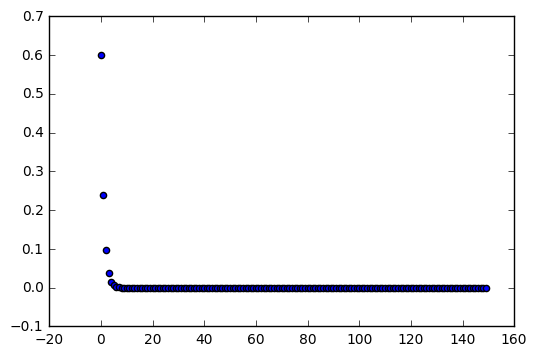

[0.59999994037552962, 0.23999999939412697, 0.096000015095182065, 0.038400015301445607, 0.015360011446513912, 0.0061440075484967991, 0.0024576046422525701, 0.00098304273133368193, 0.00039321755901473073, 0.00015728727065707446, 6.2915038402884351e-05, 2.5166083641747658e-05, 1.0066469173797931e-05, 4.0266063103529662e-06, 1.610652235986751e-06, 6.4426594756226105e-07, 2.5770900557670729e-07, 1.0308496640880328e-07, 4.1234694667802867e-08, 1.6494245254481133e-08, 6.5978886469460465e-09, 2.6392542580004082e-09, 1.0557529206719407e-09, 4.2232771509335688e-10, 1.6894484396122781e-10, 6.758506695969066e-11, 2.7037720961903238e-11, 1.0817002461323469e-11, 4.3277926874627151e-12, 1.7316308690409481e-12, 6.9291853355917576e-13, 2.7730531598381143e-13, 1.109935682488412e-13, 4.4434438047101196e-14, 1.779294860975078e-14, 7.1271121333906263e-15, 2.8559904100650384e-15, 1.1450617703397387e-15, 4.59405595335138e-16, 1.8447758929122372e-16, 7.4161613605717093e-17, 2.985661795870669e-17, 1.2042095651

In [31]:
plt.scatter(x=[_ for _ in range(150)], y=p_sums)
plt.show()
print(p_sums)

In [32]:
matr_Q_1_ = copy.deepcopy(matrQ_k[0])
for l in range(1, n+2):
    matr_Q_1_ += matrQ_k[l]

In [33]:
matr_dQ_1_ = copy.deepcopy(matrQ_k[1])
for l in range(2, n+2):
    matr_dQ_1_ += l * matrQ_k[l]

In [34]:
matr_a = copy.deepcopy(np.array(matr_Q_1_))
for i in range(matr_a.shape[0]):
    matr_a[i][0] = 1 
matr_b = np.zeros((matr_a.shape[0], 1))
matr_b[0][0] = 1
matr_a = np.transpose(matr_a)

vect_y = la.solve(matr_a, matr_b).reshape(-1)

In [35]:
vect_e = np.array([[1.] for _ in range(matr_dQ_1_.shape[1])])
ergodicity = np.dot(np.dot(vect_y, matr_dQ_1_), vect_e) 
print('ergodicity =', ergodicity[0, 0])
 
sys_load = ergodicity + lamD
print('sys_load =', sys_load)

ergodicity = -2.99999955863
sys_load = [[-0.99999956]]


In [36]:
# Условие эргодичности
block00 = kronsum(matrH0, matrS1) + kron(np.eye(V_), np.dot(matrS1_0, beta1))
block03 = kron(kron(kron(matrH1, M1_e), tau), alpha1)
block10 = kron(kron(np.eye(V_), np.dot(M2_e, beta1)), matrA2_0)
block11 = kronsum(kronsum(matrH0, matrS2), matrA2) + kron(kron(np.eye(V_), np.dot(matrS2_0, beta2)), np.eye(L2))
block12 = kron(kron(kron(matrH1, np.eye(M2)), tau), L2_e)
block21 = kron(kron(kron(np.eye(V_), np.eye(M2)), matrT0), alpha1)
block22 = kronsum(kronsum(matrH, matrS2), matrT) + kron(kron(np.eye(V_), np.dot(matrS2_0, beta2)), np.eye(R))
block30 = kron(kron(kron(np.eye(V_), beta1), matrT0), L1_e)
block32 = kron(kron(kron(np.eye(V_), beta2), np.eye(R)), matrA1_0)
block33 = kronsum(kronsum(matrH, matrT), matrA1)
block01 = np.zeros((block00.shape[0], block11.shape[1]))
block02 = np.zeros((block00.shape[0], block12.shape[1]))
block13 = np.zeros((block10.shape[0], block03.shape[1]))
block20 = np.zeros((block21.shape[0], block00.shape[1]))
block23 = np.zeros((block21.shape[0], block03.shape[1]))
block31 = np.zeros((block30.shape[0], block11.shape[1]))
matrGamma = np.bmat([[block00, block01, block02, block03],
                     [block10, block11, block12, block13],
                     [block20, block21, block22, block23],
                     [block30, block31, block32, block33]])
# pd.DataFrame(matrGamma)

In [37]:
matr_a = copy.deepcopy(np.array(matrGamma))
for i in range(matr_a.shape[0]):
    matr_a[i][0] = 1
matr_b = np.zeros((matr_a.shape[0], 1))
matr_b[0][0] = 1
matr_a = np.transpose(matr_a)

x = la.solve(matr_a, matr_b).reshape(-1)

print('x = ', x)
x1 = x[0:V_*M1]
x2 = x[V_*M1:V_*M1 + V_*M2*L2]
x3 = x[V_*M1 + V_*M2*L2: V_*M1 + V_*M2*L2 + V_*M2*R]

print('x1 = ', x1)
print('x2 = ', x2)
print('x3 = ', x3)

x =  [ 0.00000000  0.00000000  0.00000001  0.99999989  0.00000008  0.00000002]
x1 =  [ 0.00000000]
x2 =  [ 0.00000000  0.00000001]
x3 =  [ 0.99999989]


In [38]:
e_V_ = np.array([[1.] for i in range(0, V_)])
e_R = np.array([[1.] for i in range(0, R)])
pi1 = x1.dot(kron(e_V_, np.eye(M1)))
pi2 = x2.dot(kron(kron(e_V_, np.eye(M2)), L2_e))
pi3 = x3.dot(kron(kron(e_V_, np.eye(M2)), e_R))
print('pi1 = ', pi1)
print('pi2 = ', pi2)
print('pi3 = ', pi3)

pi1 =  [ 0.00000000]
pi2 =  [ 0.00000001]
pi3 =  [ 0.99999989]


In [39]:
rho = np.dot(pi1, matrS1_0) + np.dot((pi2 + pi3), matrS2_0)
print('rho = ', rho[0])

rho =  4.99999955863


In [40]:
vect_P_1_ = copy.deepcopy(vect_p_l[1])
for l in range(2, p_num):
    vect_P_1_ += vect_p_l[l]
print('P(1) =', vect_P_1_)

P(1) = [[ 0.00000000  0.00000000  0.00000000  0.39999999  0.00000006  0.00000001]]


In [41]:
vect_dP_1_ = copy.deepcopy(vect_p_l[1])
for l in range(2, p_num):
    vect_dP_1_ += l * vect_p_l[l]

In [42]:
vect_ddP_1_ = copy.deepcopy(vect_p_l[2]) * 2
for l in range(3, p_num):
    vect_ddP_1_ += l * (l - 1) * vect_p_l[l]

In [43]:
# Среднее число запросов в системе

vect_e = np.array([[1.] for _ in range(vect_dP_1_.shape[1])])
L = np.dot(vect_dP_1_, vect_e)
print('L =', L[0, 0])

L = 0.666666904507


In [44]:
# Дисперсия числа запросов в системе
dispV = np.dot(vect_ddP_1_, vect_e)[0] + L - L ** 2
print('V =', dispV[0, 0])

V = 1.11111196574


In [45]:
# Вероятность того, что прибор 1 исправен и обслуживает запрос
temp_matr = np.dot(vect_P_1_, la.block_diag(np.eye(a*M1), np.zeros((a*(M2*L2 + M2*R + R*L1), a*(M2*L2 + M2*R + R*L1)))))
vect_e = np.array([[1.] for i in range(0, temp_matr.shape[1])])
prob1work = np.dot(temp_matr, vect_e)
print('P^{(1,0)} =', prob1work[0, 0])

P^{(1,0)} = 1.15371363148e-09


In [46]:
# Вероятность того, что прибор-1 в неисправном состоянии и прибор-2 обслуживает запрос
temp_matr = np.dot(vect_P_1_, la.block_diag(np.zeros((a*M1, a*M1)), np.eye(a*M2*(L2 + R)), np.zeros((a*R*L1, a*R*L1))))
vect_e = np.array([[1.] for i in range(0, temp_matr.shape[1])])
prob1notwork = np.dot(temp_matr, vect_e)
print('P^{(2,0),(1,2)} =', prob1notwork[0, 0])

P^{(2,0),(1,2)} = 0.399999995385


In [47]:
# Вероятность того, что в системе есть запросы, прибор 1 в неисправном состоянии и идет переключение с этого прибора на прибор 2 (при этом оба  прибора не обслуживают заявки)
temp_matr = np.dot(vect_P_1_, la.block_diag(np.zeros((a*(M1+M2*(L2+R)), a*(M1+M2*(L2+R)))), np.eye(a*R*L1)))
vect_e = np.array([[1.] for i in range(0, temp_matr.shape[1])])
prob1notworkswitch2 = np.dot(temp_matr, vect_e)
print('P^{(2,1)} =', prob1notworkswitch2[0, 0])

P^{(2,1)} = 6.30856114308e-08


In [48]:
# Вероятность того, что в системе есть запросы, прибор 1 в исправном состоянии и идет переключение с  прибора 2 на прибор 1 (при этом прибор 2 продолжает обслуживать запросы)
temp_matr = np.dot(vect_P_1_, la.block_diag(np.zeros((a*M1, a*M1)), np.eye(a*M2*L2),
                                            np.zeros((a*(R*L1 + M2*R), a*(R*L1 + M2*R)))))
vect_e = np.array([[1.] for i in range(0, temp_matr.shape[1])])
prob1workswitch21 = np.dot(temp_matr, vect_e)
print('P^{(2,2)} =', prob1workswitch21[0, 0])

P^{(2,2)} = 2.83595058752e-09


In [49]:
# Вероятность того, что прибор 1 доступен (средняя доля времени, в течение которого прибор 1 доступен)
temp_matr1 = np.dot(vect_P_1_, la.block_diag(np.eye(a*M1), np.zeros((a*(M2*L2 + M2*R + R*L1), a*(M2*L2 + M2*R + R*L1)))))
vect_e = np.array([[1.] for i in range(0, temp_matr1.shape[1])])
temp_matr = np.dot(temp_matr1, vect_e)

temp_matr2 = np.dot(vect_p_l[0], la.block_diag(np.eye(a), np.zeros((a*(L2+R+R*L1), a*(L2+R+R*L1)))))
vect_e = np.array([[1.] for i in range(0, temp_matr2.shape[1])])
temp_matr += np.dot(temp_matr2, vect_e)
prob1avail = temp_matr
print('P_1+ =', prob1avail[0, 0])

P_1+ = 2.91011987226e-09


In [50]:
# Вероятность того, что прибор 1 недоступен (средняя доля времени, в течение которого прибор 1 недоступен)
temp_matr1 = np.dot(vect_P_1_, la.block_diag(np.zeros((a*M1, a*M1)), np.eye(a*(M2*L2 + M2*R + R*L1))))
vect_e = np.array([[1.] for i in range(0, temp_matr1.shape[1])])
temp_matr = np.dot(temp_matr1, vect_e)

temp_matr2 = np.dot(vect_p_l[0], la.block_diag(np.zeros((a, a)), np.eye(a*(L2+R+R*L1))))
vect_e = np.array([[1.] for i in range(0, temp_matr2.shape[1])])
temp_matr += np.dot(temp_matr2, vect_e)
prob1notavail = temp_matr
print('P_2 =', prob1notavail[0, 0])

P_2 = 0.99999999709


In [51]:
temp_matr1 = np.dot(vect_P_1_, la.block_diag(np.zeros((a*M1, a*M1)), np.eye(a*M2*(L2+R)), np.zeros((a*R*L1, a*R*L1))))
vect_e = np.array([[1.] for i in range(0, temp_matr1.shape[1])])
temp_matr = np.dot(temp_matr1, vect_e)

temp_matr2 = np.dot(vect_p_l[0], la.block_diag(np.zeros((a, a)), np.eye(a*(L2+R)), np.zeros((a*R*L1, a*R*L1))))
vect_e = np.array([[1.] for i in range(0, temp_matr2.shape[1])])
temp_matr += np.dot(temp_matr2, vect_e)

prob2_avail = temp_matr
print('P_2 =', prob2_avail[0, 0])

P_2 = 0.999999900059


In [52]:
temp_matr1 = np.dot(vect_P_1_, la.block_diag(np.zeros((a*(M1+M2*(L2+R)), a*(M1+M2*(L2+R)))), np.eye(a*R*L1)))
vect_e = np.array([[1.] for i in range(0, temp_matr1.shape[1])])
temp_matr = np.dot(temp_matr1, vect_e)

temp_matr2 = np.dot(vect_p_l[0], la.block_diag(np.zeros((a*(1+L2+R), a*(1+L2+R))), np.eye(a*R*L1)))
vect_e = np.array([[1.] for i in range(0, temp_matr2.shape[1])])
temp_matr += np.dot(temp_matr2, vect_e)

prob_both_not_avail = temp_matr
print('P- =', prob_both_not_avail[0, 0])

P- = 9.70311165667e-08


In [52]:
temp_matr1 = np.dot(vect_P_1_, la.block_diag(kron(kron(np.eye(W_), matrH1), np.eye(M1)), np.zeros((a*(M2*(L2+R)+R*L1), a*(M2*(L2+R)+R*L1)))))
vect_e = np.array([[1.] for i in range(0, temp_matr1.shape[1])])
temp_matr = np.dot(temp_matr1, vect_e)

temp_matr2 = np.dot(vect_p_l[0], la.block_diag(kron(np.eye(W_), matrH1), np.zeros((a*(L2+R+R*L1), a*(L2+R+R*L1)))))
vect_e = np.array([[1.] for i in range(0, temp_matr2.shape[1])])
temp_matr += np.dot(temp_matr2, vect_e)

switches12_num = temp_matr
print('Khi_1_2 =', switches12_num[0, 0])

Khi_1_2 = 2.91011987226e-06


In [54]:
temp_matr1 = np.dot(vect_P_1_, la.block_diag(np.zeros((a*(M1+M2*L2), a*(M1+M2*L2))), kron(np.eye(a*M2), matrT),
                                             np.zeros((a*R*L1, a*R*L1))))
vect_e = np.array([[1.] for i in range(0, temp_matr1.shape[1])])
temp_matr = np.dot(temp_matr1, vect_e)
temp_matr2 = np.dot(vect_p_l[0], la.block_diag(np.zeros((a*(1+L2), a*(1+L2))), kron(np.eye(a), matrT),
                                               np.zeros((a*R*L1, a*R*L1))))
vect_e = np.array([[1.] for i in range(0, temp_matr2.shape[1])])
temp_matr += np.dot(temp_matr2, vect_e)
switches21_num = temp_matr
print('Khi_2_1 =', -switches21_num[0, 0])

Khi_2_1 = 9.99999892969e-06
